In [1]:
import numpy as np                       
import pandas as pd                      
import matplotlib.pyplot as plt          
import seaborn as sns 

In [2]:
data = pd.read_excel('data_clean_1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34346 entries, 0 to 34345
Data columns (total 8 columns):
Unnamed: 0    34346 non-null int64
nametype      34346 non-null int64
recclass      34346 non-null int64
mass (g)      34346 non-null float64
fall          34346 non-null int64
year          34346 non-null int64
reclat        34346 non-null float64
reclong       34346 non-null float64
dtypes: float64(3), int64(5)
memory usage: 2.1 MB


In [4]:
data = data.drop('Unnamed: 0', axis = 1)

In [5]:
data.recclass.value_counts()

333    7355
184    6107
191    3833
175    3809
327    3192
374    2192
378    1637
319     915
182     385
44      328
135     308
46      307
276     266
339     223
462     211
74      205
369     195
64      179
197     176
68      173
109     168
190     163
60      116
103     115
228     112
201     104
414     101
345      88
407      84
298      83
108      77
332      75
37       75
429      69
159      68
82       67
112      67
106      63
395      62
237      57
413      57
186      56
334      54
163      54
343      54
179      54
204      53
34       52
97       51
218      51
Name: recclass, dtype: int64

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.recclass)
data.recclass = le.transform(data.recclass)

In [7]:
data

,nametype,recclass,mass (g),fall,year,reclat,reclong
0,0,34,21.0,0,1880,50.77500,6.08333
1,0,24,720.0,0,1951,56.18333,10.23333
2,0,36,780.0,0,1902,-33.16667,-64.95000
3,0,36,1620.0,0,1930,-31.60000,-65.23333
4,0,36,779.0,0,1949,29.51667,35.05000
...,...,...,...,...,...,...,...
34341,0,43,76.0,1,1973,20.25000,-12.68333
34342,0,36,1475.0,1,1990,29.03700,17.01850
34343,0,10,172.0,1,1990,29.03700,17.01850
34344,0,18,3.3,1,1939,49.25000,17.66667


In [14]:
from lightgbm import LGBMClassifier
#from imblearn.over_sampling import SMOTE

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

In [15]:
y = data['recclass']
X = data.drop('recclass', axis = 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [17]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
test_score = f1_score(y_pred, y_test, average='weighted')

In [18]:
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 8, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 2, ..., 0, 0, 1]])

In [19]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [20]:
confusion_matrix(y_test, y_pred)

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,
          0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   5,   0,   0,   0,   0,   0,   0,   1,   0,   1,   0,
          1,   0,   1,   0,   0,  20,   0,   2,   9,   0,   0,   3,   1,
          0,   2,   0,   1,   0,   1,   0,   0,   7,   0,  22,   0,   1,
          0,   0,   0,   9,   5,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  12,   0,   0,   1,   0,   0,   3,   0,   0,   0,
          0,   0,   0,   0,   0,   8,   0,   0,   0,   0,   1,  15,   0,
     

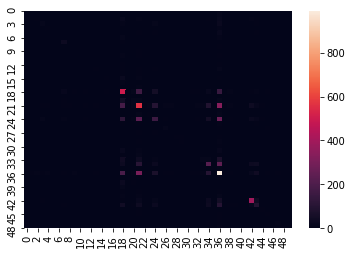

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred))

In [22]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.25737477900860173

## Do Nothing

In [188]:
data_all = pd.read_csv('Meteorite_Landings.csv')

In [189]:
data_all = data_all.drop(['name', 'id', 'GeoLocation'], axis = 1)

In [190]:
data_all['recclass'] = data_all['recclass'].astype('category')
data_all['recclass'] = data_all['recclass'].cat.codes

In [191]:
name = {'Valid': 0, 'Relict': 1}
data_all.nametype = [name[item] for item in data_all.nametype]

In [192]:
falle = {'Fell': 0, 'Found': 1}
data_all.fall = [falle[item] for item in data_all.fall]

In [193]:
data_all['year'] = pd.to_datetime(data_all['year'], errors = 'coerce')
data_all['year'] = data_all['year'].dt.year

In [194]:
value_counts = data_all.recclass.value_counts()
to_remove = value_counts[value_counts <= 50].index
data_all = data_all[~data_all.recclass.isin(to_remove)]

In [195]:
data_all

,nametype,recclass,mass (g),fall,year,reclat,reclong
0,0,327,21.0,0,1880.0,50.77500,6.08333
1,0,191,720.0,0,1951.0,56.18333,10.23333
3,0,0,1914.0,0,1976.0,16.88333,-99.90000
4,0,333,780.0,0,1902.0,-33.16667,-64.95000
7,0,184,30000.0,0,1814.0,44.21667,0.61667
...,...,...,...,...,...,...,...
45709,0,204,100000.0,1,1981.0,31.20000,112.50000
45710,0,333,1475.0,1,1990.0,29.03700,17.01850
45711,0,103,172.0,1,1990.0,29.03700,17.01850
45713,0,175,3.3,1,1939.0,49.25000,17.66667


In [196]:
y = data_all['recclass']
X = data_all.drop('recclass', axis = 1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [198]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [200]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.14351083291571465

## Imputation Using (Mean/Median)

Mean

In [201]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean') 

imp_mean.fit(X)
X_mean = imp_mean.transform(X)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y, random_state=420)

In [203]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [204]:
cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.16414962516898546

Median

In [205]:
imp_mean = SimpleImputer(strategy='median') 

imp_mean.fit(X)
X_median = imp_mean.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_median, y, random_state=420)

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [206]:
cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.25258297797052986

Most Frequent

In [207]:
imp_mean = SimpleImputer(strategy='most_frequent') 

imp_mean.fit(X)
X_most_fr = imp_mean.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_most_fr, y, random_state=420)

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [208]:
cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.25722371260881216

## Imputation Using k-NN

In [209]:
import sys
from impyute.imputation.cs import fast_knn

X_knn=fast_knn(X.values, k = 100)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, random_state=420)

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [211]:
cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.1753646572988301

In [212]:
X_knn=fast_knn(X.values, k = 300)

X_train, X_test, y_train, y_test = train_test_split(X_knn, y, random_state=420)

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.2278109835996741

##  Imputation Using Multivariate Imputation by Chained Equation (MICE)

In [117]:
from impyute.imputation.cs import mice

X_mice = mice(X)

X_train, X_test, y_train, y_test = train_test_split(X_mice, y, random_state=420)

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

/Users/aleksandrberezutskii/opt/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


0.25584054418351987

## Using Regression to impute missing data

In [152]:
from sklearn import linear_model

In [153]:
data_all.isna().any()

nametype    False
recclass    False
mass (g)     True
fall        False
year         True
reclat       True
reclong      True
dtype: bool

In [171]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [178]:
missing_columns = ['nametype','mass (g)', 'fall', 'year', 'reclat', 'reclong']


In [179]:
for feature in missing_columns:
    data_all[feature + '_imp'] = data_all[feature]
    data_all = random_imputation(data_all, feature)

In [180]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = data_all[feature + "_imp"]
    parameters = list(set(data_all.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = data_all[parameters], y = data_all[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[data_all[feature].isnull(), "Det" + feature] = model.predict(data_all[parameters])[data_all[feature].isnull()]

In [182]:
deter_data

,Detnametype,Detmass (g),Detfall,Detyear,Detreclat,Detreclong
0,0.0,21.0,0.0,1880.0,50.77500,6.08333
1,0.0,720.0,0.0,1951.0,56.18333,10.23333
3,0.0,1914.0,0.0,1976.0,16.88333,-99.90000
4,0.0,780.0,0.0,1902.0,-33.16667,-64.95000
7,0.0,30000.0,0.0,1814.0,44.21667,0.61667
...,...,...,...,...,...,...
45709,0.0,100000.0,1.0,1981.0,31.20000,112.50000
45710,0.0,1475.0,1.0,1990.0,29.03700,17.01850
45711,0.0,172.0,1.0,1990.0,29.03700,17.01850
45713,0.0,3.3,1.0,1939.0,49.25000,17.66667


In [183]:
X_train, X_test, y_train, y_test = train_test_split(deter_data, y, random_state=420)

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.2243739851298161

## Stochastic Regression Imputation (Hot-Deck imputation)

In [186]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data["Ran" + feature] = data_all[feature + '_imp']
    parameters = list(set(data_all.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = data_all[parameters], y = data_all[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(data_all[parameters])
    std_error = (predict[data_all[feature].notnull()] - data_all.loc[data_all[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = data_all[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(data_all[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(data_all[feature].isnull()) & 
                                                                            (random_predict > 0)]


In [187]:
X_train, X_test, y_train, y_test = train_test_split(random_data, y, random_state=420)

clf = LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cohen_score = cohen_kappa_score(y_test, y_pred)
cohen_score

0.24841735744960258